### Data Pre-Processing

In [53]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df_matches = pd.read_csv("matches.csv")
df_matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [54]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [55]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


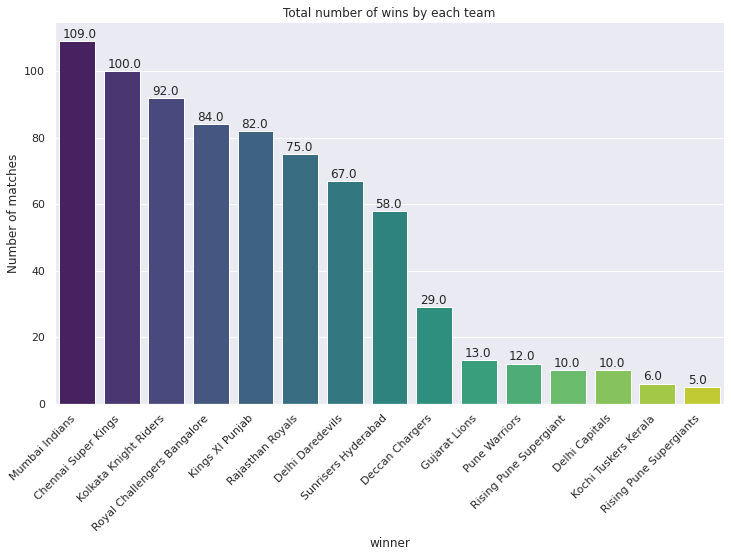

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
def annot_plot(ax,w,h):# function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
plt.figure(figsize=(12,7))
ax = sns.countplot("winner", data = df_matches, order = df_matches['winner'].value_counts().index,palette='viridis')
plt.title("Total number of wins by each team")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of matches')
annot_plot(ax,0.08,1)
plt.show()

In [44]:
print(df_matches.columns)
print(df_deliveries.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [57]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [58]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [59]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
#Rising pune supergiants name also included in two ways. But i am not doing with that because RPS team is not playing this season.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

In [60]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [61]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head()

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel
462,463,2014,NaN,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,0,Delhi Capitals,0,4,JP Duminy
466,467,2014,NaN,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,0,Chennai Super Kings,7,0,RA Jadeja
468,469,2014,NaN,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,4,0,AJ Finch


In [62]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [63]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder are having null values. But if you consider today questions only player_dismissed and dismissal_kind is useful features. So i am removing fielder feature.

Filling player_dismissed null values with 'no wicket' and dismissal_kind feature null value also no wicket becuase for those balls batsman is not out.

In [64]:
#dropping columns
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


### Exploratory Data Analysis(EDA)

### Q1) Who will win this match(KKR or MI)

In [65]:
#plotting KKR and MI wins against all teams
import plotly.graph_objs as go
df_winner = df_matches[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)
df_winner = df_winner[(df_winner['winner'] == 'Mumbai Indians') | (df_winner['winner'] == 'Kolkata Knight Riders')]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Total wins by KKR and MI in IPL',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

In [66]:
# Lets check winning ratio between MI VS KKR
df_RCB_KXIP = df_matches[((df_matches['team1'] == 'Kolkata Knight Riders') | (df_matches['team1'] == 'Mumbai Indians')) & 
                         ((df_matches['team2'] == 'Kolkata Knight Riders') | (df_matches['team2'] == 'Mumbai Indians'))] 

#plotting MI and KKR wins against each other
import plotly.graph_objs as go
df_winner = df_RCB_KXIP[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by MI and KKR against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show() 

By looking at above two plots only we can say that Mumbai indians is dominated against KKR in previous seasons.

Winning ratio is 19:6, that tells you MI are clearly favourites. One more thing as per my cricket knowledge MI core team is almost same from last 4-5 years. 

So i am predicting Mumbai will win today match as well.

### Q2) How many wickets will MI loose in overs(6-15)

First ball of 6th over means 5.1 ball and last ball of 15th over means 14.6 ball.

In [67]:
#first lets filter out mumbai rows with overs(6-15) from batting team column and over column.
df_Mumbai_6to15 = df_deliveries[(df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['over'] >= 6) & (df_deliveries['over'] <= 15)]

no_of_wickets_6to15 = len(df_Mumbai_6to15[df_Mumbai_6to15['player_dismissed'] != 'No Wicket'])
print(no_of_wickets_6to15, "wickets lost by MI from 6 to 15 overs in", df_Mumbai_6to15['match_id'].nunique(), "matches")


470 wickets lost by MI from 6 to 15 overs in 187 matches


Actually in IPL team will change every 2years. So its better to look at individual player records than team records.

In [68]:
#Lets look at how many wickets taken by present top 3 KKR bowlers
df_KKR_bowlers_6to15 = df_deliveries[(df_deliveries['bowler'] == 'SP Narine') | (df_deliveries['bowler'] == 'AD Russell') |
                                     (df_deliveries['bowler'] == 'PJ Cummins') ] 

no_of_wickets_6t015 = len(df_KKR_bowlers_6to15[df_KKR_bowlers_6to15['player_dismissed'] != 'No Wicket'])
print(no_of_wickets_6t015, "wickets taken by top 3 KKR bowlers from 6 to 15 overs in", df_KKR_bowlers_6to15['match_id'].nunique(), "matches")


216 wickets taken by top 3 KKR bowlers from 6 to 15 overs in 136 matches


**Conclusion :-**

By looking at above two analysis we can say that MI is loosing 2wickets per match and KKR bowlers also taking almost 2wickets per match.

I am predicting in today match MI will lose 0-2 wickets. 



### Q3) How many fours will be hit by KKR in this match

Number of fours is dependent on boundaries length(pitch) and batsman.

In [69]:
#Lets filter out average number of fours hitted at Abu Dhabi(beacuse today match is at abu dhabi)
# To do this we have to combine both matches and deliveries datasets
df_total_data = pd.merge(df_matches, df_deliveries, left_on='id',right_on='match_id', how='outer')

#here i am filtering out only 4's. Actually in batsman_runs column 5 value also present this because of overthrow from fielder.
#But we dont know weather 5's are coming from boundary(4) or running between wickets. 

df_4s_abudhabi = df_total_data[(df_total_data['city'] == 'Abu Dhabi') & (df_total_data['batsman_runs'] == 4)]
total_4s_abudhabi = df_4s_abudhabi.shape[0]
print(total_4s_abudhabi, " fours are hitted at abudhabi in",(df_4s_abudhabi['match_id'].nunique())*2, "innings")

167  fours are hitted at abudhabi in 14 innings


In [70]:
average_4s = (total_4s_abudhabi)/((df_4s_abudhabi['match_id'].nunique())*2)
print("Number of fours hitted at abudhabi per innings is", int(average_4s))

Number of fours hitted at abudhabi per innings is 11


**Conclusion :-**

So as per above analysis i am predicting KKR will hit 9-12 fours in today match.

### Q4) How many runs will be scored in the match?

In [71]:
MI_KKR_runs = df_deliveries[((df_deliveries['batting_team'] == 'Mumbai Indians') | (df_deliveries['batting_team'] == 'Kolkata Knight Riders'))]
                             
print("Number of runs scored by MI and KKR teams till now in ipl",MI_KKR_runs['total_runs'].sum()) 
print("Number of matches played by MI and KKR teams till now in ipl",MI_KKR_runs['match_id'].nunique()) 

Number of runs scored by MI and KKR teams till now in ipl 57228
Number of matches played by MI and KKR teams till now in ipl 340


In [72]:
MI_KKR_average = MI_KKR_runs['batsman_runs'].sum()/MI_KKR_runs['match_id'].nunique()
print("Number of runs scored in a match by MI and KKR batsman per innings is",int(MI_KKR_average))
#We are calculating runs scored in a match(i.e 2 innings)
print("Number of runs scored in a match by MI and KKR batsman Per match is",int(2*MI_KKR_average))

Number of runs scored in a match by MI and KKR batsman per innings is 158
Number of runs scored in a match by MI and KKR batsman Per match is 317


**Conclusion :-**

By looking at above analysis they scored almost 320 runs per match.

I am predicting they will score 320-340 runs in today match.

### Q5) How will Rohit Sharma get out in the match

In [75]:
# First lets filter out rohit sharma and kind of dismisslas
df_rohit = df_deliveries[(df_deliveries['batsman'] == 'RG Sharma') & (df_deliveries['dismissal_kind'] != 'No Wicket')]

df_rohit['dismissal_kind'].value_counts()

caught               103
bowled                22
run out               17
lbw                   11
caught and bowled      6
stumped                3
Name: dismissal_kind, dtype: int64

He caught out most of the times then any other dismissals in IPL till now.

But lets look at Rohit sharma dismissals against current KKR bowlers.

In [88]:
df_rohit_kkrbowlers = df_deliveries[((df_deliveries['batsman'] == 'RG Sharma') & (df_deliveries['dismissal_kind'] != 'No Wicket'))
                                                                                &
                                    ((df_deliveries['bowler'] == 'SP Narine') | (df_deliveries['bowler'] == 'AD Russell') |
                                     (df_deliveries['bowler'] == 'PJ Cummins'))]
df_rohit_kkrbowlers['dismissal_kind'].value_counts()                            

caught               2
bowled               2
lbw                  1
caught and bowled    1
Name: dismissal_kind, dtype: int64

So rohit caught 2 times and bowled 2 times against current KKR bowlers.

**Conclusion :-**

By looking at above 2 analysis Rohit sharma caught out most times in IPL and against KKR bowlers also he mostly caught out.

I am predicting Rohit will caught out in today match as well.